# Classification via Logistic Regression

<center><h2 style = "color:gray">Monfero, John Benedict</h2></center>
<hr>

<center><h3 style = "color: teal">Assessment Objective</h3></center>

<h5 style = "color: maroon">The objective of this assessment is to develop an understanding of logistic regression and its application in binary classification tasks. You will implement logistic regression using the Titanic dataset, analyze model performance, and interpret the results. </h5>

##### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<center><h3 style = "color: coral">Data Preprocessing</h3></center><hr>

In [2]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<center><h3 style = "color: coral">Exploratory Data Analysis</h3></center><hr>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

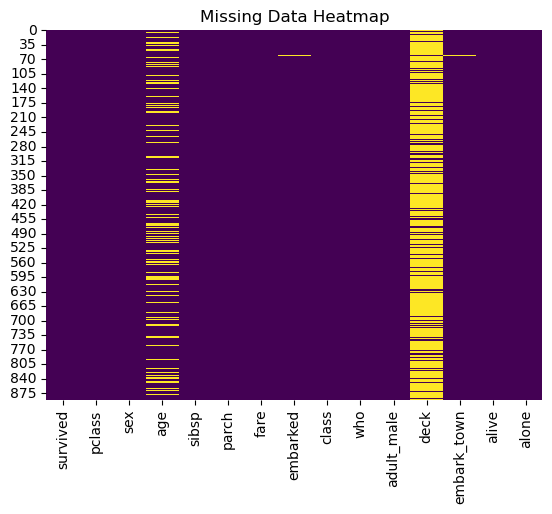

In [3]:
# Check dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Count missing values
print(df.isnull().sum())

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

<center><h3 style = "color: coral">Handling Missing Values</h3></center><hr>

In [4]:
# Drop columns with too many missing values or irrelevant for prediction
df = df.drop(columns=['deck', 'embark_town', 'alive'])

# Drop rows with missing 'embarked' values
df = df.dropna(subset=['embarked'])

# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

# Drop any remaining rows with missing values (e.g., 'embarked', 'fare')
df = df.dropna()

<center><h3 style = "color: coral">Encoding Categorical Variables</h3></center><hr>

In [5]:
# Convert 'sex' and 'embarked' into numeric using Label Encoding
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])       # male=1, female=0
df['embarked'] = le.fit_transform(df['embarked'])  # C=0, Q=1, S=2

<center><h3 style = "color: coral">Feature Selection and Scaling</h3></center><hr>

In [6]:
# Select relevant features
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<center><h3 style = "color: coral">Train-Test Split</h3></center><hr>

In [7]:
# Split into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

<center><h3 style = "color: coral">Logistic Regression Model</h3></center><hr>

In [8]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

<center><h3 style = "color: coral">Evaluation</h3></center><hr>

Accuracy: 0.7696629213483146
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.68      0.77      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178



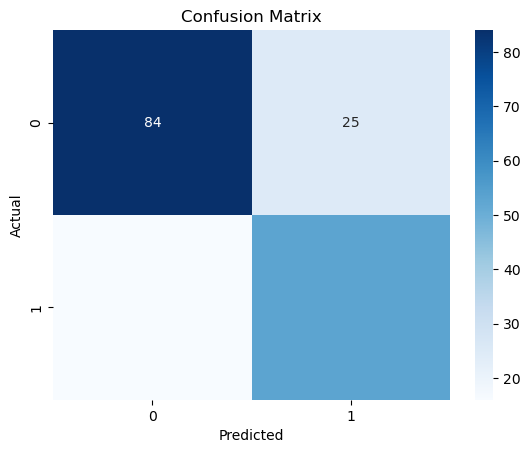

In [9]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-score:  {f1:.2f}")

Accuracy:  0.77
Precision: 0.68
Recall:    0.77
F1-score:  0.72


<center><h3 style = "color: coral">ROC Curve and AUC Score</h3></center><hr>

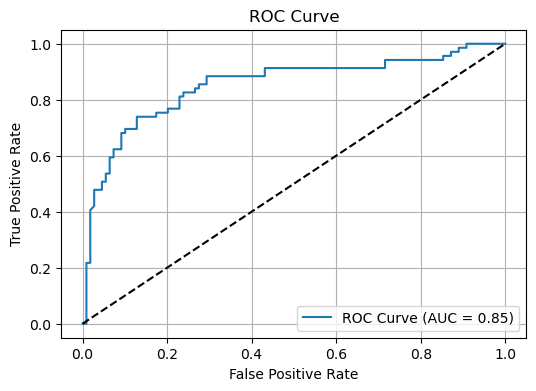

In [11]:
# Predict probabilities for ROC
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

<center><h3 style = "color: coral">Results Interpretation & Discussion</h3></center><hr>

📌 **Interpretation:**

> **Accuracy** indicates that around 77% of predictions are correct.

> **Precision** tells us that 68% of the predicted survivors were actually survivors (True Positives).

> **Recall** which has value of 77% reflects how well the model identifies actual survivors.

> **F1-Score** balances precision and recall — useful for imbalanced classes if there is.

> **AUC Score** which is 85% in the given model, indicates how well the model separates the classes; values closer to 100% mean better performance.

📌 **Discussion:**
> As we implement the logistic regression, we are able analyze the dataset `Titanic` and we address how certain features of one person could influence its binary classification results, which is that person a survivor or not a survivor. However, the model does predict better only if its robust enough by maximizing the Accuracy, and Precision, one way is to reduce the complexicity of the model by ranking which features shall consider before making the Logistic Regressions

<center><h3 style = "color: coral">Feature Importance</h3></center><hr>

In [20]:
importance = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', key=abs, ascending=False)

print(feature_importance)

    Feature  Importance
1       sex   -1.310774
0    pclass   -0.939762
2       age   -0.560860
3     sibsp   -0.418895
6  embarked   -0.214888
5      fare    0.079597
4     parch   -0.058197


<center><h3 style = "color: coral">Conclusion and Implications</h3></center><hr>

##### Based on the Feature Important and Logistic Regression Analysis made

> Features like sex (gender) and fare are strong indicators of survival.
>
> Women had a significantly higher chance of survival (positive coefficient for `sex=0` = female).
>
> Higher-class passengers (lower `pclass`) were more likely to survive.
>
> This aligns with real Titanic survival policies: "women and children first," and class-based evacuation.

